In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import pandas as pd
import csv
import os
import glob
from scipy.stats import linregress

In [2]:
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def find_nearest(lst, K):
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

def splash_HandT(height,splashy,splasht,return_splash,return_time):
    for i in range(0,len(splashy)):
        nearest = find_nearest(splashy[i],height)
        index = np.where(splashy[i] == nearest)
        return_splash.append(nearest)
        return_time.append(splasht[i][index[0][0]])

def splash_atTime(time,splashy,splasht,return_splash,return_time):
    for i in range(0,len(splashy)):
        nearest = find_nearest(splasht[i],time)
        index = np.where(splasht[i] == nearest)
        return_splash.append(splashy[i][index[0][0]])
        return_time.append(nearest)

In [4]:
# Name the files you want to import
P = '/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/';
A = 'analysis';
names = ['06262023.W10','06272023.W22','06282023.SuperGlue','06282023.W28','10082023.W17Fixed',
         '06292023.W22','06302023.W22','07072023.W22','07132023.W10','07132023.W28','07142023.W17','07142023.W22']
hinge_names = ['06292023.W22','06302023.W22','07072023.W22','07132023.W10','07132023.W28','07142023.W17','07142023.W22']
#names = ['06262023.W10','06272023.W22','06282023.SuperGlue','06282023.W28','06292023.W22',
#         '06302023.W22','07072023.W22','07132023.W10','07132023.W28','07142023.W17','07142023.W22','10082023.W17Fixed']
#names = ['06272023.W22','06282023.SuperGlue','06302023.W22','07072023.W22']
#color_bi = ['b','b','k','k']
#shape_bi = ['^','^','o','o']
#color_m = ['b','g','g','r','g','g','g','b','r','k','g']
shape_bi = ['^','^','^','^','o','o','o','o','o','o','o','^']
color_bi = ['darkturquoise','darkturquoise','darkturquoise','darkturquoise','k','k','k','k','k','k','k','darkturquoise']
legend = ['F10', 'F22', 'F22', 'F28', 'H22', 'H22', 'H22', 'H10', 'H28', 'H17', 'H22' ]
scalar_header = ['v_o point 1','v_o point 2','d_p point 1','d_p point 2','splash height','time of splash height']
# v_o = impact velocity # d_p = depth of pinch off # splash height # time of splash height

In [5]:
E1 = []; E2 = []; T_E1 = []; T_E2 = []
I1 = []; I2 = []; T_I1 = []; T_I2 = []
P1 = []; P2 = []; T_P1 = []; T_P2 = []
Sp = []; Sx = []; T_Sp = []
Sc = []; T6 = []


for i in range(0,len(names)):
    # Entry Velocity Profile
    E1.append(glob.glob(P + A + os.path.join('/' + names[i] + "_entry1.csv")))
    E2.append(glob.glob(P + A + os.path.join('/' + names[i] + "_entry2.csv")))
    # Impact Velocity Profile
    I1.append(glob.glob(P + A + os.path.join('/' + names[i] + "_impact1.csv")))
    I2.append(glob.glob(P + A + os.path.join('/' + names[i] + "_impact2.csv")))
    # Pinch off Velocity Profile
    P1.append(glob.glob(P + A + os.path.join('/' + names[i] + "_pinch1.csv")))
    P2.append(glob.glob(P + A + os.path.join('/' + names[i] + "_pinch2.csv")))
    # Scalar Values
    Sc.append(glob.glob(P + A + os.path.join('/' + names[i] + "_scalars.csv")))
    # Splash Velocity Profile
    Sp.append(glob.glob(P + A + os.path.join('/' + names[i] + "_splash.csv")))
    Sx.append(glob.glob(P + A + os.path.join('/' + names[i] + "_splash_pos.csv")))
    # Entry Velocity Profile Time List
    T_E1.append(glob.glob(P + A + os.path.join('/' + names[i] + "_entry1_time.csv")))
    T_E2.append(glob.glob(P + A + os.path.join('/' + names[i] + "_entry2_time.csv")))
    # Impact Velocity Profile Time List
    T_I1.append(glob.glob(P + A + os.path.join('/' + names[i] + "_impact1_time.csv")))
    T_I2.append(glob.glob(P + A + os.path.join('/' + names[i] + "_impact2_time.csv")))
    # Pinch off Velocity Profile Time List
    T_P1.append(glob.glob(P + A + os.path.join('/' + names[i] + "_pinch1_time.csv")))
    T_P2.append(glob.glob(P + A + os.path.join('/' + names[i] + "_pinch2_time.csv")))
    # Splash Velocity Profile Time List
    T_Sp.append(glob.glob(P + A + os.path.join('/' + names[i] + "_splash_time.csv")))
    # Splash Height at Tau = 6
    T6.append(glob.glob(P + A + os.path.join('/' + names[i] + "_splashT6.csv")))


    
angle_files = []
    
for i in range(0,len(hinge_names)):
    angle_files.append(glob.glob(P + A + os.path.join('/' + hinge_names[i] + "_angles.csv")))

In [6]:
fixed_scalars = []
hinge_scalars = []
fixed_splash = []
hinge_splash = []

for i in range(0,len(Sc)):
    scalars = np.loadtxt(Sc[i][0],delimiter=',',skiprows=0)
    splashs = np.loadtxt(T6[i][0],delimiter=',',skiprows=0)
    
    if i <= 4:
        fixed_scalars.extend(scalars)
        fixed_splash.extend(splashs)
    else:
        hinge_scalars.extend(scalars)
        hinge_splash.extend(splashs)

fixed_impact1 = []
hinge_impact1 = []
fixed_depthc2 = []
hinge_depthc2 = []
fixed_pinch_t = []
hinge_pinch_t = []

for i in range(0,len(fixed_scalars)):
    fixed_impact1.append(fixed_scalars[i][0])
    fixed_depthc2.append(fixed_scalars[i][7])
    fixed_pinch_t.append(fixed_scalars[i][8])

for i in range(0,len(hinge_scalars)):
    hinge_impact1.append(hinge_scalars[i][0])
    hinge_depthc2.append(hinge_scalars[i][7])
    hinge_pinch_t.append(hinge_scalars[i][8])

In [7]:
degrees = []

for i in range(0,len(angle_files)):
    current = np.loadtxt(angle_files[i][0],delimiter=',',skiprows=0)
    degrees.extend(current)

In [8]:
'''
Conversion from in to cm
'''

for i in range(0,len(fixed_depthc2)):
    fixed_depthc2[i] = np.abs(fixed_depthc2[i]) * 2.54
for i in range(0,len(hinge_depthc2)):
    hinge_depthc2[i] = np.abs(hinge_depthc2[i]) * 2.54
    
for i in range(0,len(fixed_splash)):
    fixed_splash[i] = fixed_splash[i] * 2.54
for i in range(0,len(hinge_splash)):
    hinge_splash[i] = hinge_splash[i] * 2.54
    
for i in range(0,len(fixed_impact1)):
    fixed_impact1[i] = np.abs(fixed_impact1[i])
for i in range(0,len(hinge_impact1)):
    hinge_impact1[i] = np.abs(hinge_impact1[i])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


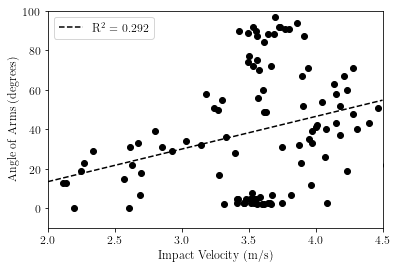

In [9]:
H_slope, H_intercept, H_rvalue, H_pvalue, H_stderr = linregress(hinge_impact1, degrees)
X = np.linspace(2,4.5,100)

H_rvalue = round(H_rvalue, 3)

# Hinged and Fixed Impact Velocity v Depth of Pinch Off
plt.figure()
plt.plot(X,H_slope*X+H_intercept,'--',color='k',label='R$^2$ = '+str(H_rvalue))
plt.plot(hinge_impact1,degrees,'o',color='k')
plt.xlabel('Impact Velocity (m/s)')
plt.ylabel('Angle of Arms (degrees)')
plt.legend()
plt.xlim(2,4.5)
plt.ylim(-10,100)
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/angle-impactVelocityAll.png',dpi=1200)

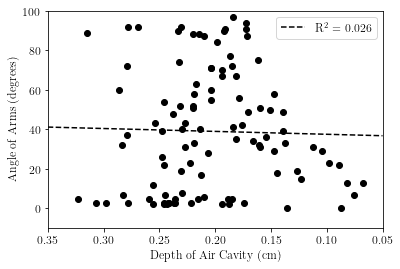

In [10]:
H_slope, H_intercept, H_rvalue, H_pvalue, H_stderr = linregress(hinge_depthc2, degrees)
X = np.linspace(0.35,0.05,100)

H_rvalue = round(H_rvalue, 3)

# Hinged and Fixed Impact Velocity v Depth of Pinch Off
plt.figure()
plt.plot(X,H_slope*X+H_intercept,'--',color='k',label='R$^2$ = '+str(H_rvalue))
plt.plot(hinge_depthc2,degrees,'o',color='k')
plt.xlabel('Depth of Air Cavity (cm)')
plt.ylabel('Angle of Arms (degrees)')
plt.legend()
plt.xlim(0.35,0.05)
plt.ylim(-10,100)
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/angle-pinchOffDepthAll.png',dpi=1200)

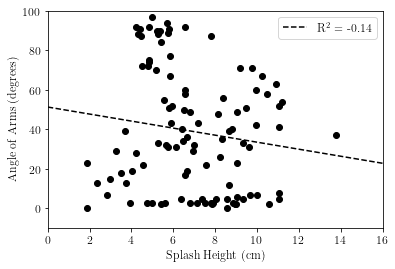

In [11]:
H_slope, H_intercept, H_rvalue, H_pvalue, H_stderr = linregress(hinge_splash, degrees)
X = np.linspace(0,16,100)

H_rvalue = round(H_rvalue, 3)

# Hinged and Fixed Impact Velocity v Depth of Pinch Off
plt.figure()
plt.plot(X,H_slope*X+H_intercept,'--',color='k',label='R$^2$ = '+str(H_rvalue))
plt.plot(hinge_splash,degrees,'o',color='k')
plt.xlabel('Splash Height (cm)')
plt.ylabel('Angle of Arms (degrees)')
plt.legend()
plt.xlim(0,16)
plt.ylim(-10,100)
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/angle-splash.png',dpi=1200)

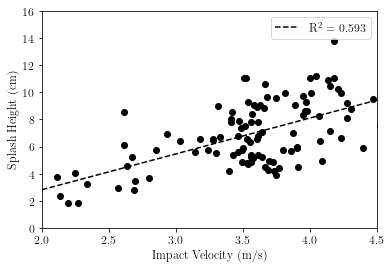

In [12]:
H_slope, H_intercept, H_rvalue, H_pvalue, H_stderr = linregress(hinge_impact1, hinge_splash)
X = np.linspace(2,4.5,100)

H_rvalue = round(H_rvalue, 3)

# Hinged and Fixed Impact Velocity v Depth of Pinch Off
plt.figure()
plt.plot(X,H_slope*X+H_intercept,'--',color='k',label='R$^2$ = '+str(H_rvalue))
plt.plot(hinge_impact1,hinge_splash,'o',color='k')
plt.xlabel('Impact Velocity (m/s)')
plt.ylabel('Splash Height (cm)')
plt.legend()
plt.xlim(2,4.5)
plt.ylim(0,16)
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/splash-impactVelocityAll.png',dpi=1200)

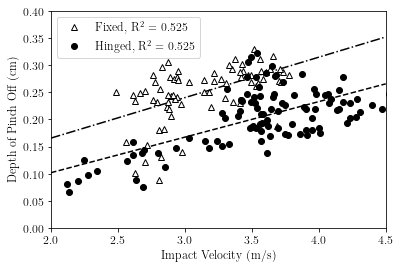

In [13]:
F_slope, F_intercept, F_rvalue, F_pvalue, F_stderr = linregress(fixed_impact1, fixed_depthc2)
H_slope, H_intercept, H_rvalue, H_pvalue, H_stderr = linregress(hinge_impact1, hinge_depthc2)
X = np.linspace(2,4.5,100)

F_rvalue = round(F_rvalue, 3)
H_rvalue = round(H_rvalue, 3)

# Hinged and Fixed Impact Velocity v Depth of Pinch Off
plt.figure()
plt.plot(X,F_slope*X+F_intercept,'-.',color='k')
plt.plot(X,H_slope*X+H_intercept,'--',color='k')
plt.plot(fixed_impact1,fixed_depthc2,'^',color='k',markerfacecolor='w',label='Fixed, R$^2$ = '+str(F_rvalue)) 
plt.plot(hinge_impact1,hinge_depthc2,'o',color='k',label='Hinged, R$^2$ = '+str(F_rvalue))
plt.xlabel('Impact Velocity (m/s)')
plt.ylabel('Depth of Pinch Off (cm)')
F_patch = mpatches.Patch(color='darkturquoise', label='Fixed, R$^2$ = '+str(F_rvalue)) 
H_patch = mpatches.Patch(color='k', label='Hinged, R$^2$ = '+str(H_rvalue)) 
plt.legend()#handles=[F_patch, H_patch],frameon=False)
plt.xlim(2,4.5)
plt.ylim(0,0.4)
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/velocity-pinchDepth.png',dpi=1200)

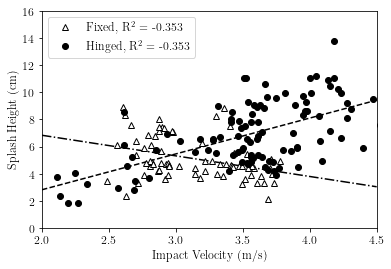

In [14]:
F_slope, F_intercept, F_rvalue, F_pvalue, F_stderr = linregress(fixed_impact1, fixed_splash)
H_slope, H_intercept, H_rvalue, H_pvalue, H_stderr = linregress(hinge_impact1, hinge_splash)
X = np.linspace(2,4.5,100)

F_rvalue = round(F_rvalue, 3)
H_rvalue = round(H_rvalue, 3)

# Hinged and Fixed Impact Velocity v Depth of Pinch Off
plt.figure()
plt.plot(X,F_slope*X+F_intercept,'-.',color='k')
plt.plot(X,H_slope*X+H_intercept,'--',color='k')
plt.plot(fixed_impact1,fixed_splash,'^',color='k',markerfacecolor='w',label='Fixed, R$^2$ = '+str(F_rvalue)) 
plt.plot(hinge_impact1,hinge_splash,'o',color='k',label='Hinged, R$^2$ = '+str(F_rvalue))
plt.xlabel('Impact Velocity (m/s)')
plt.ylabel('Splash Height (cm)')
F_patch = mpatches.Patch(color='darkturquoise', label='Fixed, R$^2$ = '+str(F_rvalue)) 
H_patch = mpatches.Patch(color='k', label='Hinged, R$^2$ = '+str(H_rvalue)) 
plt.legend()#handles=[F_patch, H_patch],frameon=False)
plt.xlim(2,4.5)
plt.ylim(0,16)
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/velocity-splash.png',dpi=1200)

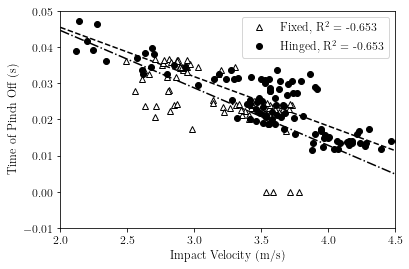

In [15]:
F_slope, F_intercept, F_rvalue, F_pvalue, F_stderr = linregress(fixed_impact1, fixed_pinch_t)
H_slope, H_intercept, H_rvalue, H_pvalue, H_stderr = linregress(hinge_impact1, hinge_pinch_t)
X = np.linspace(2,4.5,100)

F_rvalue = round(F_rvalue, 3)
H_rvalue = round(H_rvalue, 3)

# Hinged and Fixed Impact Velocity v Depth of Pinch Off
plt.figure()
plt.plot(X,F_slope*X+F_intercept,'-.',color='k')
plt.plot(X,H_slope*X+H_intercept,'--',color='k')
plt.plot(fixed_impact1,fixed_pinch_t,'^',color='k',markerfacecolor='w',label='Fixed, R$^2$ = '+str(F_rvalue)) 
plt.plot(hinge_impact1,hinge_pinch_t,'o',color='k',label='Hinged, R$^2$ = '+str(F_rvalue))
F_patch = mpatches.Patch(color='darkturquoise', label='Fixed, R$^2$ = '+str(F_rvalue)) 
H_patch = mpatches.Patch(color='k', label='Hinged, R$^2$ = '+str(H_rvalue)) 
plt.xlabel('Impact Velocity (m/s)')
plt.ylabel('Time of Pinch Off (s)')
plt.xlim(2,4.5)
plt.ylim(-0.01,0.05)
plt.legend()#(handles=[F_patch, H_patch],frameon=False,loc='lower right')
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/velocity-pinchTime.png',dpi=1200)

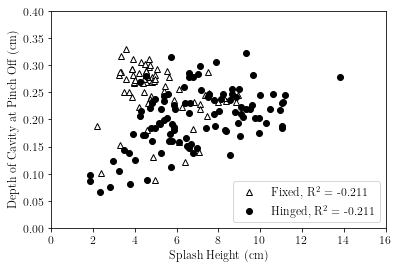

In [16]:
F_slope, F_intercept, F_rvalue, F_pvalue, F_stderr = linregress(fixed_splash, fixed_depthc2)
H_slope, H_intercept, H_rvalue, H_pvalue, H_stderr = linregress(hinge_splash, hinge_depthc2)
X = np.linspace(0,16,100)

F_rvalue = round(F_rvalue, 3)
H_rvalue = round(H_rvalue, 3)

# Hinged and Fixed Impact Velocity v Depth of Pinch Off
plt.figure()
#plt.plot(X,F_slope*X+F_intercept,'--',color='darkturquoise')
#plt.plot(X,H_slope*X+H_intercept,'--',color='k')
plt.plot(fixed_splash,fixed_depthc2,'^',color='k',markerfacecolor='w',label='Fixed, R$^2$ = '+str(F_rvalue)) 
plt.plot(hinge_splash,hinge_depthc2,'o',color='k',label='Hinged, R$^2$ = '+str(F_rvalue))
plt.xlabel('Splash Height (cm)')
plt.ylabel('Depth of Cavity at Pinch Off (cm)')
F_patch = mpatches.Patch(color='darkturquoise', label='Fixed, R$^2$ = '+str(F_rvalue)) 
H_patch = mpatches.Patch(color='k', label='Hinged, R$^2$ = '+str(H_rvalue)) 
plt.legend()#(handles=[F_patch, H_patch],frameon=False)
plt.xlim(0,16)
plt.ylim(0,0.4)
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/depthCavity-splashT6.png',dpi=1200)

In [17]:
'''
These next few cells calculate non dimensional values and may re assigne things, always re start from the top
after resetting the kernal after using them :)
'''

'\nThese next few cells calculate non dimensional values and may re assigne things, always re start from the top\nafter resetting the kernal after using them :)\n'

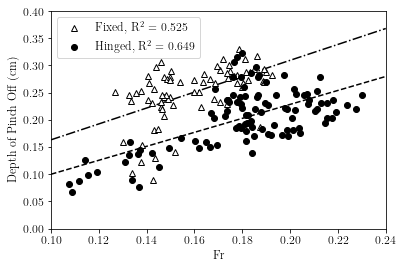

In [18]:
# Froude Number
# Fr = u / sqrt(g / L)
# where t is pinch off time, g is gravity, and L is the chosen length scale
# generally the papers we will compare with use the diameter
# we don't have a constant diameter, 0.0254 x 0.0381 m

nonD_fixed = np.array(fixed_impact1) / np.sqrt(9.81 / 0.0254)
nonD_hinge = np.array(hinge_impact1) / np.sqrt(9.81 / 0.0254)

F_slope, F_intercept, F_rvalue, F_pvalue, F_stderr = linregress(nonD_fixed, fixed_depthc2)
H_slope, H_intercept, H_rvalue, H_pvalue, H_stderr = linregress(nonD_hinge, hinge_depthc2)
X = np.linspace(0.1,0.24,100)

F_rvalue = round(F_rvalue, 3)
H_rvalue = round(H_rvalue, 3)

# Hinged and Fixed Impact Velocity v Depth of Pinch Off
plt.figure()
plt.plot(X,F_slope*X+F_intercept,'-.',color='k')#color='darkturquoise')
plt.plot(X,H_slope*X+H_intercept,'--',color='k')
plt.plot(nonD_fixed,fixed_depthc2,'^',color='k',markerfacecolor='w',label='Fixed, R$^2$ = '+str(F_rvalue)) 
plt.plot(nonD_hinge,hinge_depthc2,'o',color='k',label='Hinged, R$^2$ = '+str(H_rvalue)) 
#F_patch = mpatches.Patch(color='w',edgecolors='black', label='Fixed, R$^2$ = '+str(F_rvalue)) 
#H_patch = mpatches.Patch(color='k', label='Hinged, R$^2$ = '+str(H_rvalue)) 
plt.xlabel('Fr')
plt.ylabel('Depth of Pinch Off (cm)')
plt.xlim(0.1,0.24)
plt.ylim(0,0.40)
plt.legend()#handles=[F_patch, H_patch],frameon=False,loc='upper left')
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/Fr-pinchDepth.png',dpi=1200)

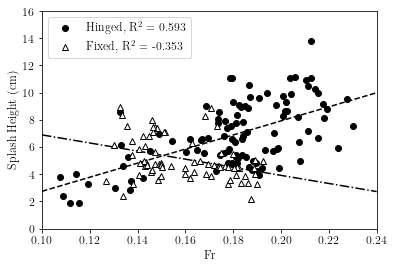

In [19]:
F_slope, F_intercept, F_rvalue, F_pvalue, F_stderr = linregress(nonD_fixed, fixed_splash)
H_slope, H_intercept, H_rvalue, H_pvalue, H_stderr = linregress(nonD_hinge, hinge_splash)
X = np.linspace(0.1,0.24,100)

F_rvalue = round(F_rvalue, 3)
H_rvalue = round(H_rvalue, 3)

# Hinged and Fixed Impact Velocity v Depth of Pinch Off
plt.figure()
plt.plot(X,F_slope*X+F_intercept,'-.',color='k')#color='darkturquoise')
plt.plot(X,H_slope*X+H_intercept,'--',color='k')
plt.plot(nonD_hinge,hinge_splash,'o',color='k',label='Hinged, R$^2$ = '+str(H_rvalue)) 
plt.plot(nonD_fixed,fixed_splash,'^',color='k',markerfacecolor='w',label='Fixed, R$^2$ = '+str(F_rvalue)) 
plt.xlabel('Fr')
plt.ylabel('Splash Height (cm)')
plt.xlim(0.1,0.24)
plt.ylim(0,16)
plt.legend()
#plt.legend(handles=[F_patch, H_patch],frameon=False,loc='upper left')
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/Fr-SplashHeight.png',dpi=1200)

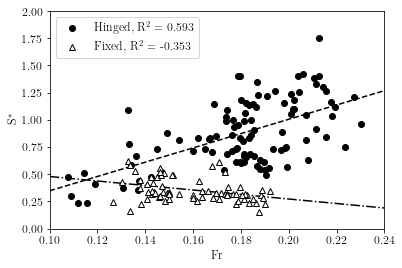

In [20]:
fixed_s_star = fixed_splash
hinge_s_star = hinge_splash

arm_length  = 7.88 # m
body_length = 14.4 # m

for i in range(0,len(fixed_splash)):
    fixed_s_star[i] = fixed_splash[i] / body_length
for i in range(0,len(hinge_splash)):
    hinge_s_star[i] = hinge_splash[i] / arm_length

F_slope, F_intercept, F_rvalue, F_pvalue, F_stderr = linregress(nonD_fixed, fixed_s_star)
H_slope, H_intercept, H_rvalue, H_pvalue, H_stderr = linregress(nonD_hinge, hinge_s_star)
X = np.linspace(0.1,0.24,100)

F_rvalue = round(F_rvalue, 3)
H_rvalue = round(H_rvalue, 3)

# Hinged and Fixed Impact Velocity v Depth of Pinch Off
plt.figure()
plt.plot(X,F_slope*X+F_intercept,'-.',color='k')
plt.plot(X,H_slope*X+H_intercept,'--',color='k')
plt.plot(nonD_hinge,hinge_s_star,'o',color='k',label='Hinged, R$^2$ = '+str(H_rvalue)) 
plt.plot(nonD_fixed,fixed_s_star,'^',color='k',markerfacecolor='w',label='Fixed, R$^2$ = '+str(F_rvalue)) 
plt.xlabel('Fr')
plt.ylabel('S$^*$')
F_patch = mpatches.Patch(color='darkturquoise', label='Fixed, R$^2$ = '+str(F_rvalue)) 
H_patch = mpatches.Patch(color='k', label='Hinged, R$^2$ = '+str(H_rvalue)) 
plt.legend()#(handles=[F_patch, H_patch],frameon=False)
plt.xlim(0.1,0.24)
plt.ylim(0,2)
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/velocity-D-star-splash.png',dpi=1200)

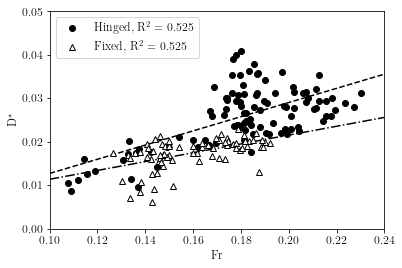

In [21]:
fixed_d_star = fixed_depthc2
hinge_d_star = hinge_depthc2

arm_length  = 7.88 # m
body_length = 14.4 # m

for i in range(0,len(fixed_depthc2)):
    fixed_d_star[i] = fixed_depthc2[i] / body_length
for i in range(0,len(hinge_depthc2)):
    hinge_d_star[i] = hinge_depthc2[i] / arm_length

F_slope, F_intercept, F_rvalue, F_pvalue, F_stderr = linregress(nonD_fixed, fixed_d_star)
H_slope, H_intercept, H_rvalue, H_pvalue, H_stderr = linregress(nonD_hinge, hinge_d_star)
X = np.linspace(0.1,0.24,100)

F_rvalue = round(F_rvalue, 3)
H_rvalue = round(H_rvalue, 3)

# Hinged and Fixed Impact Velocity v Depth of Pinch Off
plt.figure()
plt.plot(X,F_slope*X+F_intercept,'-.',color='k')
plt.plot(X,H_slope*X+H_intercept,'--',color='k')
plt.plot(nonD_hinge,hinge_d_star,'o',color='k',label='Hinged, R$^2$ = '+str(F_rvalue))
plt.plot(nonD_fixed,fixed_d_star,'^',color='k',markerfacecolor='w',label='Fixed, R$^2$ = '+str(F_rvalue)) 
plt.xlabel('Fr')
plt.ylabel('D$^*$')
F_patch = mpatches.Patch(color='darkturquoise', label='Fixed, R$^2$ = '+str(F_rvalue)) 
H_patch = mpatches.Patch(color='k', label='Hinged, R$^2$ = '+str(H_rvalue)) 
plt.legend()#(handles=[F_patch, H_patch],frameon=False)
plt.xlim(0.1,0.24)
plt.ylim(0.0,0.05)
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/velocity-D-star.png',dpi=1200)

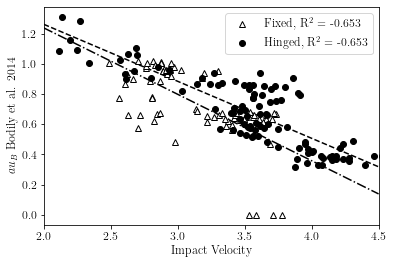

In [22]:
# Non Dimensional Time from Bodily et al. 2014
# Tau = t * sqrt( g / r )
# where t is pinch off time, g is gravity, and r is radius
# we don't have a constant diameter, 0.0254 x 0.0381 m
# must divide by two to get the radius (duh)

nonD_fixed = np.array(fixed_pinch_t) * np.sqrt(9.81 / (0.0254 / 2))
nonD_hinge = np.array(hinge_pinch_t) * np.sqrt(9.81 / (0.0254 / 2))

F_slope, F_intercept, F_rvalue, F_pvalue, F_stderr = linregress(fixed_impact1, nonD_fixed)
H_slope, H_intercept, H_rvalue, H_pvalue, H_stderr = linregress(hinge_impact1, nonD_hinge)
X = np.linspace(2,4.5,100)

F_rvalue = round(F_rvalue, 3)
H_rvalue = round(H_rvalue, 3)

# Hinged and Fixed Impact Velocity v Depth of Pinch Off
plt.figure()
plt.plot(X,F_slope*X+F_intercept,'-.',color='k')
plt.plot(X,H_slope*X+H_intercept,'--',color='k')
plt.plot(fixed_impact1,nonD_fixed,'^',color='k',markerfacecolor='w',label='Fixed, R$^2$ = '+str(F_rvalue)) 
plt.plot(hinge_impact1,nonD_hinge,'o',color='k',label='Hinged, R$^2$ = '+str(F_rvalue))
F_patch = mpatches.Patch(color='darkturquoise', label='Fixed, R$^2$ = '+str(F_rvalue)) 
H_patch = mpatches.Patch(color='k', label='Hinged, R$^2$ = '+str(H_rvalue)) 
plt.xlabel('Impact Velocity')
plt.ylabel('$\tau_B$ Bodily et al. 2014')
plt.xlim(2,4.5)
#plt.ylim(-0.01,0.05)
plt.legend()#(handles=[F_patch, H_patch],frameon=False,loc='lower right')
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/velocity-pinchTime.png',dpi=1200)

In [ ]:
W22_names = ['06292023.W22','06302023.W22','07072023.W22','07142023.W22']
W10_names = ['07132023.W10']
W28_names = ['07132023.W28']
W17_names = ['07142023.W17']

In [ ]:
W22_Sc = []
W22_Sp = []

for i in range(0,len(W22_names)):
    # Scalar Values
    W22_Sc.append(glob.glob(P + A + os.path.join('/' + W22_names[i] + "_scalars.csv")))
    W22_Sc.append(glob.glob(P + A + os.path.join('/' + W22_names[i] + "_splashT6.csv")))
    
W22_angle_files = []
    
for i in range(0,len(W22_names)):
    W22_angle_files.append(glob.glob(P + A + os.path.join('/' + W22_names[i] + "_angles.csv")))
    
W10_Sc = []; W17_Sc = []; W28_Sc = []
W10_Sp = []; W17_Sp = []; W28_Sp = []

for i in range(0,1):
    # Scalar Values
    W10_Sc.append(glob.glob(P + A + os.path.join('/' + W10_names[i] + "_scalars.csv")))
    W17_Sc.append(glob.glob(P + A + os.path.join('/' + W17_names[i] + "_scalars.csv")))
    W28_Sc.append(glob.glob(P + A + os.path.join('/' + W28_names[i] + "_scalars.csv")))
    # Splash Values
    W10_Sp.append(glob.glob(P + A + os.path.join('/' + W10_names[i] + "_splashT6.csv")))
    W17_Sp.append(glob.glob(P + A + os.path.join('/' + W17_names[i] + "_splashT6.csv")))
    W28_Sp.append(glob.glob(P + A + os.path.join('/' + W28_names[i] + "_splashT6.csv")))

    
W10_angle_files = []; W17_angle_files = []; W28_angle_files = []
    
for i in range(0,1):
    W10_angle_files.append(glob.glob(P + A + os.path.join('/' + W10_names[i] + "_angles.csv")))
    W17_angle_files.append(glob.glob(P + A + os.path.join('/' + W17_names[i] + "_angles.csv")))
    W28_angle_files.append(glob.glob(P + A + os.path.join('/' + W28_names[i] + "_angles.csv")))

In [ ]:
W22_scalars = [] 
W10_scalars = []
W17_scalars = []
W28_scalars = []

for i in range(0,len(W10_Sc)):
    current = np.loadtxt(W10_Sc[i][0],delimiter=',',skiprows=0)
    W10_scalars.extend(current)
for i in range(0,len(W17_Sc)):
    current = np.loadtxt(W17_Sc[i][0],delimiter=',',skiprows=0)
    W17_scalars.extend(current)
for i in range(0,len(W22_Sc)):
    current = np.loadtxt(W22_Sc[i][0],delimiter=',',skiprows=0)
    W22_scalars.extend(current)    
for i in range(0,len(W28_Sc)):
    current = np.loadtxt(W28_Sc[i][0],delimiter=',',skiprows=0)
    W28_scalars.extend(current)
    
W10_impact1 = []; W10_depthc2 = []; W10_pinch_t = []
W17_impact1 = []; W17_depthc2 = []; W17_pinch_t = []
W22_impact1 = []; W22_depthc2 = []; W22_pinch_t = []
W28_impact1 = []; W28_depthc2 = []; W28_pinch_t = []

for i in range(0,len(W10_scalars)):
    W10_impact1.append(W10_scalars[i][0])
    W10_depthc2.append(W10_scalars[i][7])
    W10_pinch_t.append(W10_scalars[i][8])
for i in range(0,len(W17_scalars)):
    W17_impact1.append(W17_scalars[i][0])
    W17_depthc2.append(W17_scalars[i][7])
    W17_pinch_t.append(W17_scalars[i][8])
for i in range(0,len(W22_scalars)):
    W22_impact1.append(W22_scalars[i][0])
    W22_depthc2.append(W22_scalars[i][7])
    W22_pinch_t.append(W22_scalars[i][8])
for i in range(0,len(W28_scalars)):
    W28_impact1.append(W28_scalars[i][0])
    W28_depthc2.append(W28_scalars[i][7])
    W28_pinch_t.append(W28_scalars[i][8])

W10_degrees = []

for i in range(0,len(W10_angle_files)):
    current = np.loadtxt(W10_angle_files[i][0],delimiter=',',skiprows=0)
    W10_degrees.extend(current)
    
W17_degrees = []

for i in range(0,len(W17_angle_files)):
    current = np.loadtxt(W17_angle_files[i][0],delimiter=',',skiprows=0)
    W17_degrees.extend(current)

W22_degrees = []

for i in range(0,len(W22_angle_files)):
    current = np.loadtxt(W22_angle_files[i][0],delimiter=',',skiprows=0)
    W22_degrees.extend(current)

W28_degrees = []

for i in range(0,len(W28_angle_files)):
    current = np.loadtxt(W28_angle_files[i][0],delimiter=',',skiprows=0)
    W28_degrees.extend(current)

In [ ]:
'''
for i in range(0,len(W22_scalars)):
    W22_impact1.append(W22_scalars[i][0])
    W22_depthc2.append(W22_scalars[i][7])
    W22_pinch_t.append(W22_scalars[i][8])
'''
for i in range(0,len(W22_scalars)):
    print(W22_scalars[i][0])

In [ ]:
for i in range(0,len(W10_Sp)):
    current = np.loadtxt(W10_Sp[i][0],delimiter=',',skiprows=0)
    W10_splash.extend(current)
for i in range(0,len(W17_Sp)):
    current = np.loadtxt(W17_Sp[i][0],delimiter=',',skiprows=0)
    W17_splash.extend(current)
for i in range(0,len(W22_Sp)):
    current = np.loadtxt(W22_Sp[i][0],delimiter=',',skiprows=0)
    W22_splash.extend(current)
for i in range(0,len(W28_Sp)):
    current = np.loadtxt(W28_Sp[i][0],delimiter=',',skiprows=0)
    W28_splash.extend(current)

In [ ]:
W10_slope, W10_intercept, W10_rvalue, W10_pvalue, W10_stderr = linregress(W10_impact1, W10_degrees)
W17_slope, W17_intercept, W17_rvalue, W17_pvalue, W17_stderr = linregress(W17_impact1, W17_degrees)
W22_slope, W22_intercept, W22_rvalue, W22_pvalue, W22_stderr = linregress(W22_impact1, W22_degrees)
W28_slope, W28_intercept, W28_rvalue, W28_pvalue, W28_stderr = linregress(W28_impact1, W28_degrees)
X = np.linspace(-4.5,-2,100)

W10_rvalue = round(W10_rvalue, 3)
W17_rvalue = round(W17_rvalue, 3)
W22_rvalue = round(W22_rvalue, 3)
W28_rvalue = round(W28_rvalue, 3)


# Hinged and Fixed Impact Velocity v Depth of Pinch Off
plt.figure()
#plt.plot(X,W10_slope*X+W10_intercept,'--',color='k')
#plt.plot(X,W17_slope*X+W17_intercept,'--',color='b')
#plt.plot(X,W22_slope*X+W22_intercept,'--',color='r')
#plt.plot(X,W28_slope*X+W28_intercept,'--',color='g')
plt.plot(W10_impact1,W10_degrees,'o',label='W10 Hinged')#+'R$^2$ = '+str(W10_rvalue))
plt.plot(W17_impact1,W17_degrees,'o',label='W17 Hinged')#+'R$^2$ = '+str(W17_rvalue))
plt.plot(W22_impact1,W22_degrees,'o',label='W22 Hinged')#+'R$^2$ = '+str(W22_rvalue))
plt.plot(W28_impact1,W28_degrees,'o',label='W28 Hinged')#+'R$^2$ = '+str(W28_rvalue))
plt.xlabel('Impact Velocity')
plt.ylabel('Angle of Arms 0.006s After Impact')
plt.legend()
plt.xlim(-5,-2)
plt.ylim(-10,110)
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/angle-impactVelocity.png',dpi=1200)

In [ ]:
W10_slope, W10_intercept, W10_rvalue, W10_pvalue, W10_stderr = linregress(W10_depthc2, W10_degrees)
W17_slope, W17_intercept, W17_rvalue, W17_pvalue, W17_stderr = linregress(W17_depthc2, W17_degrees)
W22_slope, W22_intercept, W22_rvalue, W22_pvalue, W22_stderr = linregress(W22_depthc2, W22_degrees)
W28_slope, W28_intercept, W28_rvalue, W28_pvalue, W28_stderr = linregress(W28_depthc2, W28_degrees)
X = np.linspace(-4.5,-2,100)

W10_rvalue = round(W10_rvalue, 3)
W17_rvalue = round(W17_rvalue, 3)
W22_rvalue = round(W22_rvalue, 3)
W28_rvalue = round(W28_rvalue, 3)


# Hinged and Fixed Impact Velocity v Depth of Pinch Off
plt.figure()
#plt.plot(X,W10_slope*X+W10_intercept,'--',color='k')
#plt.plot(X,W17_slope*X+W17_intercept,'--',color='b')
#plt.plot(X,W22_slope*X+W22_intercept,'--',color='r')
#plt.plot(X,W28_slope*X+W28_intercept,'--',color='g')
plt.plot(W10_depthc2,W10_degrees,'o',label='W10 Hinged')#+'R$^2$ = '+str(W10_rvalue))
plt.plot(W17_depthc2,W17_degrees,'o',label='W17 Hinged')#+'R$^2$ = '+str(W17_rvalue))
plt.plot(W22_depthc2,W22_degrees,'o',label='W22 Hinged')#+'R$^2$ = '+str(W22_rvalue))
plt.plot(W28_depthc2,W28_degrees,'o',label='W28 Hinged')#+'R$^2$ = '+str(W28_rvalue))
plt.xlabel('Depth of Pinch Off')
plt.ylabel('Angle of Arms 0.006s After Impact')
plt.legend()
plt.ylim(-10,110)
plt.xlim(-0.14,-0.0)
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/angle-pinchoffdepth.png',dpi=1200)

In [ ]:
W10_slope, W10_intercept, W10_rvalue, W10_pvalue, W10_stderr = linregress(W10_pinch_t, W10_degrees)
W17_slope, W17_intercept, W17_rvalue, W17_pvalue, W17_stderr = linregress(W17_pinch_t, W17_degrees)
W22_slope, W22_intercept, W22_rvalue, W22_pvalue, W22_stderr = linregress(W22_pinch_t, W22_degrees)
W28_slope, W28_intercept, W28_rvalue, W28_pvalue, W28_stderr = linregress(W28_pinch_t, W28_degrees)
X = np.linspace(-4.5,-2,100)

W10_rvalue = round(W10_rvalue, 3)
W17_rvalue = round(W17_rvalue, 3)
W22_rvalue = round(W22_rvalue, 3)
W28_rvalue = round(W28_rvalue, 3)


# Hinged and Fixed Impact Velocity v Depth of Pinch Off
plt.figure()
#plt.plot(X,W10_slope*X+W10_intercept,'--',color='k')
#plt.plot(X,W17_slope*X+W17_intercept,'--',color='b')
#plt.plot(X,W22_slope*X+W22_intercept,'--',color='r')
#plt.plot(X,W28_slope*X+W28_intercept,'--',color='g')
plt.plot(W10_pinch_t,W10_degrees,'o',color='k',label='W10 '+'R$^2$ = '+str(W10_rvalue))
plt.plot(W17_pinch_t,W17_degrees,'o',color='b',label='W17 '+'R$^2$ = '+str(W17_rvalue))
plt.plot(W22_pinch_t,W22_degrees,'o',color='r',label='W22 '+'R$^2$ = '+str(W22_rvalue))
plt.plot(W28_pinch_t,W28_degrees,'o',color='g',label='W28 '+'R$^2$ = '+str(W28_rvalue))
plt.xlabel('Pinch Off Time')
plt.ylabel('Angle of Arms 0.006s After Impact')
plt.legend()
plt.ylim(-10,110)
plt.xlim(0.01,0.05)
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/angle-pinchOffTime.png',dpi=1200)

In [ ]:
'''
Here the plots begin to be separated by wedge models
May have an issue running the cells below after running all of the ones above.
Worth a shot re-starting and then jumping here after running the first eight cells in the notebook :)
'''

In [ ]:
# for W22 0-3 are hinged, 4-5 are fixed
W22_names = ['06292023.W22','06302023.W22','07072023.W22','07142023.W22','06272023.W22','06282023.SuperGlue']
# for W10, W28, W17 0 is hinged and 1 is fixed
W10_names = ['07132023.W10','06262023.W10']
W28_names = ['07132023.W28','06282023.W28']
W17_names = ['07142023.W17','10082023.W17Fixed']

In [ ]:
W22_Sc = []
W22_I1 = []

for i in range(0,len(W22_names)):
    # Scalar Values
    W22_Sc.append(glob.glob(P + A + os.path.join('/' + W22_names[i] + "_scalars.csv")))
    # Impact Velocity
    W22_I1.append(glob.glob(P + A + os.path.join('/' + W22_names[i] + "_impact1.csv")))
    
W10_Sc = []; W17_Sc = []; W28_Sc = []
W10_I1 = []; W17_I1 = []; W28_I1 = []

for i in range(0,2):
    # Scalar Values
    W10_Sc.append(glob.glob(P + A + os.path.join('/' + W10_names[i] + "_scalars.csv")))
    W17_Sc.append(glob.glob(P + A + os.path.join('/' + W17_names[i] + "_scalars.csv")))
    W28_Sc.append(glob.glob(P + A + os.path.join('/' + W28_names[i] + "_scalars.csv")))
    # Impact Velocity
    W10_I1.append(glob.glob(P + A + os.path.join('/' + W10_names[i] + "_impact1.csv")))
    W17_I1.append(glob.glob(P + A + os.path.join('/' + W17_names[i] + "_impact1.csv")))
    W28_I1.append(glob.glob(P + A + os.path.join('/' + W28_names[i] + "_impact1.csv")))

In [ ]:
# Assigning Scalars to Arrays
W10_Sc_Fixed = []; W10_Sc_Hinge = []
W17_Sc_Fixed = []; W17_Sc_Hinge = []
W28_Sc_Fixed = []; W28_Sc_Hinge = []

for i in range(0,len(W10_Sc)):
    scalars1 = np.loadtxt(W10_Sc[i][0],delimiter=',',skiprows=0)
    scalars2 = np.loadtxt(W17_Sc[i][0],delimiter=',',skiprows=0)
    scalars3 = np.loadtxt(W28_Sc[i][0],delimiter=',',skiprows=0)

    if i == 0:
        W10_Sc_Hinge.extend(scalars1)
        W17_Sc_Hinge.extend(scalars2)
        W28_Sc_Hinge.extend(scalars3)
    else:
        W10_Sc_Fixed.extend(scalars1)
        W17_Sc_Fixed.extend(scalars2)
        W28_Sc_Fixed.extend(scalars3)

In [ ]:
W22_Sc_Fixed = []; W22_Sc_Hinge = []

for i in range(0,len(W22_Sc)):
    scalars = np.loadtxt(W22_Sc[i][0],delimiter=',',skiprows=0)
    
    if i <= 3:
        W22_Sc_Hinge.extend(scalars)
    else:
        W22_Sc_Fixed.extend(scalars)

In [ ]:
W10_impactv_F = []; W10_depthc2_F = []
W17_impactv_F = []; W17_depthc2_F = []
W22_impactv_F = []; W22_depthc2_F = []
W28_impactv_F = []; W28_depthc2_F = []
W10_impactv_H = []; W10_depthc2_H = []
W17_impactv_H = []; W17_depthc2_H = []
W22_impactv_H = []; W22_depthc2_H = []
W28_impactv_H = []; W28_depthc2_H = []

for i in range(0,len(W10_Sc_Fixed)):
    W10_impactv_F.append(W10_Sc_Fixed[i][0])
    W10_depthc2_F.append(W10_Sc_Fixed[i][7])

for i in range(0,len(W10_Sc_Hinge)):
    W10_impactv_H.append(W10_Sc_Hinge[i][0])
    W10_depthc2_H.append(W10_Sc_Hinge[i][7])
    
for i in range(0,len(W17_Sc_Fixed)):
    W17_impactv_F.append(W17_Sc_Fixed[i][0])
    W17_depthc2_F.append(W17_Sc_Fixed[i][7])

for i in range(0,len(W17_Sc_Hinge)):
    W17_impactv_H.append(W17_Sc_Hinge[i][0])
    W17_depthc2_H.append(W17_Sc_Hinge[i][7])
    
for i in range(0,len(W22_Sc_Fixed)):
    W22_impactv_F.append(W22_Sc_Fixed[i][0])
    W22_depthc2_F.append(W22_Sc_Fixed[i][7])

for i in range(0,len(W22_Sc_Hinge)):
    W22_impactv_H.append(W22_Sc_Hinge[i][0])
    W22_depthc2_H.append(W22_Sc_Hinge[i][7])
    
for i in range(0,len(W28_Sc_Fixed)):
    W28_impactv_F.append(W28_Sc_Fixed[i][0])
    W28_depthc2_F.append(W28_Sc_Fixed[i][7])

for i in range(0,len(W28_Sc_Hinge)):
    W28_impactv_H.append(W28_Sc_Hinge[i][0])
    W28_depthc2_H.append(W28_Sc_Hinge[i][7])

In [ ]:
plt.figure()
plt.title('W28')
plt.plot(W28_impactv_H,W28_depthc2_H,'o',label='Hinged')
plt.plot(W28_impactv_F,W28_depthc2_F,'o',label='Fixed')
plt.xlabel('Impact Velocity')
plt.ylabel('Depth of Pinch Off')
plt.legend()
plt.show()

In [ ]:
plt.figure()
#plt.title('W22')
plt.plot(W22_impactv_H,W22_depthc2_H,'o',label='W22 Hinged')
plt.plot(W22_impactv_F,W22_depthc2_F,'o',label='W22 Fixed')
plt.legend()
plt.xlabel('Impact Velocity')
plt.ylabel('Depth of Pinch Off')
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/W22-velocity-depth.png',dpi=1200)

In [ ]:
plt.figure()
plt.title('W10')
plt.plot(W10_impactv_H,W10_depthc2_H,'o',label='Hinged')
plt.plot(W10_impactv_F,W10_depthc2_F,'o',label='Fixed')
plt.xlabel('Impact Velocity')
plt.ylabel('Depth of Pinch Off')
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.title('W17')
plt.plot(W17_impactv_H,W17_depthc2_H,'o',label='Hinged')
plt.plot(W17_impactv_F,W17_depthc2_F,'o',label='Fixed')
plt.xlabel('Impact Velocity')
plt.ylabel('Depth of Pinch Off')
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot(W28_impactv_F,W28_depthc2_F,'o',label='W28 Fixed')
plt.plot(W22_impactv_F,W22_depthc2_F,'o',label='W22 Fixed')
plt.plot(W17_impactv_F,W17_depthc2_F,'o',label='W17 Fixed')
plt.plot(W10_impactv_F,W10_depthc2_F,'o',label='W10 Fixed')
plt.legend(loc='upper left')
plt.xlim(-5,-1.5)
plt.ylim(-0.14,0.0)
plt.xlabel('Impact Velocity')
plt.ylabel('Depth of Pinch Off')
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/Fixed-velocity-depth.png',dpi=1200)

In [ ]:
plt.figure()
plt.plot(W28_impactv_H,W28_depthc2_H,'o',label='W28 Hinged')
plt.plot(W22_impactv_H,W22_depthc2_H,'o',label='W22 Hinged')
plt.plot(W17_impactv_H,W17_depthc2_H,'o',label='W17 Hinged')
plt.plot(W10_impactv_H,W10_depthc2_H,'o',label='W10 Hinged')
plt.legend()
plt.xlim(-5,-1.5)
plt.ylim(-0.14,0.0)
plt.xlabel('Impact Velocity')
plt.ylabel('Depth of Pinch Off')
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/Hinged-velocity-depth.png',dpi=1200)

In [ ]:
# Fixed
W28_d_star_F = W28_depthc2_F
W22_d_star_F = W22_depthc2_F
W17_d_star_F = W17_depthc2_F
W10_d_star_F = W10_depthc2_F
# Hinged
W28_d_star_H = W28_depthc2_H
W22_d_star_H = W22_depthc2_H
W17_d_star_H = W17_depthc2_H
W10_d_star_H = W10_depthc2_H

arm_length  = 7.88 # m
body_length = 14.4 # m

# Fixed
for i in range(0,len(W28_depthc2_F)):
    W28_d_star_F[i] = W28_depthc2_F[i] / body_length
for i in range(0,len(W22_depthc2_F)):
    W22_d_star_F[i] = W22_depthc2_F[i] / body_length
for i in range(0,len(W17_depthc2_F)):
    W17_d_star_F[i] = W17_depthc2_F[i] / body_length
for i in range(0,len(W10_depthc2_F)):
    W10_d_star_F[i] = W10_depthc2_F[i] / body_length
# Hinged
for i in range(0,len(W28_depthc2_H)):
    W28_d_star_H[i] = W28_depthc2_H[i] / arm_length
for i in range(0,len(W22_depthc2_H)):
    W22_d_star_H[i] = W22_depthc2_H[i] / arm_length
for i in range(0,len(W17_depthc2_H)):
    W17_d_star_H[i] = W17_depthc2_H[i] / arm_length
for i in range(0,len(W10_depthc2_H)):
    W10_d_star_H[i] = W10_depthc2_H[i] / arm_length

plt.figure()
#Fixed
plt.plot(W28_impactv_F,W28_d_star_F,'o',label='W28 Fixed')
plt.plot(W22_impactv_F,W22_d_star_F,'o',label='W22 Fixed')
plt.plot(W17_impactv_F,W17_d_star_F,'o',label='W17 Fixed')
plt.plot(W10_impactv_F,W10_d_star_F,'o',label='W10 Fixed')
# Hinged
plt.plot(W28_impactv_H,W28_d_star_H,'o',label='W28 Hinged')
plt.plot(W22_impactv_H,W22_d_star_H,'o',label='W22 Hinged')
plt.plot(W17_impactv_H,W17_d_star_H,'o',label='W17 Hinged')
plt.plot(W10_impactv_H,W10_d_star_H,'o',label='W10 Hinged')
plt.legend()
plt.xlim(-5,-1.5)
#plt.ylim(-0.14,0.0)
plt.xlabel('Impact Velocity')
plt.ylabel('Depth of Pinch Off')
#plt.show()
plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
analysis/labeled-d-star.png',dpi=1200)

In [ ]:
plt.figure()
plt.title('W28')
plt.plot(W28_impactv_H,W28_depthc2_H,'o',label='Hinged')
plt.plot(W28_impactv_F,W28_depthc2_F,'o',label='Fixed')
plt.xlabel('Impact Velocity')
plt.ylabel('Depth of Pinch Off')
plt.legend()
plt.show()

In [ ]:
plt.figure()
#plt.title('W22')
plt.plot(W22_impactv_H,W22_depthc2_H,'o',label='W22 Hinged')
plt.plot(W22_impactv_F,W22_depthc2_F,'o',label='W22 Fixed')
plt.legend()
plt.xlabel('Impact Velocity')
plt.ylabel('Depth of Pinch Off')
#plt.show()
#plt.savefig('/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Summer-2023-Diver-Experiments/\
#analysis/W22-velocity-depth.png',dpi=1200)

In [ ]:
plt.figure()
plt.title('W10')
plt.plot(W10_impactv_H,W10_depthc2_H,'o',label='Hinged')
plt.plot(W10_impactv_F,W10_depthc2_F,'o',label='Fixed')
plt.xlabel('Impact Velocity')
plt.ylabel('Depth of Pinch Off')
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.title('W17')
plt.plot(W17_impactv_H,W17_depthc2_H,'o',label='Hinged')
plt.plot(W17_impactv_F,W17_depthc2_F,'o',label='Fixed')
plt.xlabel('Impact Velocity')
plt.ylabel('Depth of Pinch Off')
plt.legend()
plt.show()